## Context
- This is image data of Natural Scenes around the world.

## Content
- This Data contains around 25k images of size 150x150 distributed under 6 categories.
- {'buildings' -> 0,
- 'forest' -> 1,
- 'glacier' -> 2,
- 'mountain' -> 3,
- 'sea' -> 4,
- 'street' -> 5 }

- The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.
- This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

## Acknowledgements
- Thanks to https://datahack.analyticsvidhya.com for the challenge and Intel for the Data
- Photo by Jan Böttinger on Unsplash

## Inspiration
 - Want to build powerful Neural network that can classify these images with more accuracy.

### Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pwd

'/Users/berkatbhatti/Desktop/python/Portfolio/CNN_ConvolutionalNeuralNetworks /Intel Image Classification'

In [3]:
import zipfile

- with zipfile.ZipFile("resources/intel.zip", mode="r") as zipp:
 - zipp.extractall("resources")

In [4]:
pwd

'/Users/berkatbhatti/Desktop/python/Portfolio/CNN_ConvolutionalNeuralNetworks /Intel Image Classification'

In [5]:
data_dir = "/Volumes/External_HD/Data/Kaggle/images/intel_images"

In [6]:
os.listdir(data_dir)

['.DS_Store', 'seg_pred', 'seg_test', 'seg_train']

### Train and test directories

In [7]:
train_dir = data_dir+'/seg_train/seg_train'

In [8]:
os.listdir(train_dir)

['.DS_Store', 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [9]:
test_dir = data_dir+"/seg_test/seg_test"

In [10]:
os.listdir(test_dir)

['.DS_Store', 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

### Taking a look at a sample image
- since each iamge is 150x150x3 we do not need to alter the image shape

In [11]:
from matplotlib.image import imread

In [12]:
os.listdir(train_dir+"/"+"buildings")[0]

'0.jpg'

In [13]:
sample_image = imread(train_dir+"/"+"buildings"+"/0.jpg")

In [46]:
sample_image_path = train_dir+"/"+"buildings"+"/0.jpg"

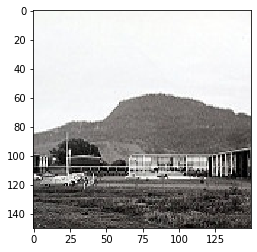

In [14]:
plt.imshow(sample_image)

### Network Shape

In [15]:
network_shape = (150,150,3)

### Image Generator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
img_gen = ImageDataGenerator(
 rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255,
)

### Testing generator on sample image

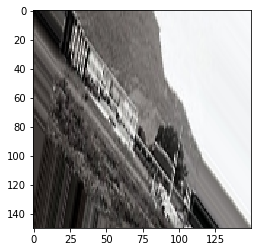

In [18]:
plt.imshow(img_gen.random_transform(sample_image))

### Ceating the network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D, Conv2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
img_gen.flow_from_directory(train_dir)

Found 14034 images belonging to 6 classes.


## Early stopping
- pRevent overfitting of our model 

In [21]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=4)

In [23]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = network_shape,
                strides = (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = network_shape,
                strides = (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = network_shape,
                strides = (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 6, activation= "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam")

### Generator for train and test set

In [22]:
train_gen = img_gen.flow_from_directory

In [23]:
train_gen = img_gen.flow_from_directory(
     train_dir,
    target_size= network_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=6,
)

Found 14034 images belonging to 6 classes.


In [24]:
test_gen = img_gen.flow_from_directory(
     test_dir,
    target_size= network_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=6,
    shuffle=False
)

Found 3000 images belonging to 6 classes.


In [25]:
from tensorflow.keras.models import load_model

In [26]:
model = load_model("intel.h5")

### Fitting the model

In [28]:
## results = model.fit_generator(train_gen, validation_data=test_gen, epochs=10, callbacks=[stop])

In [29]:
## pd.DataFrame(results.history).plot()

### Importing Model

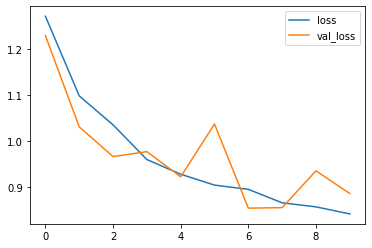

In [30]:
pd.read_csv("model_history.csv", index_col="Unnamed: 0").plot()

In [31]:
results= model.predict_generator(test_gen)

In [33]:
pred = model.predict_generator(test_gen)

In [35]:
pred > 0.5

array([[ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [ True, False, False, False, False, False],
       ...,
       [False, False, False,  True, False, False],
       [False, False, False, False, False,  True],
       [False, False, False, False, False,  True]])

In [36]:
pred.shape

(3000, 6)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [39]:
pred_labels = np.argmax(pred, axis = 1)

In [40]:
print(classification_report(test_gen.classes, pred_labels))

              precision    recall  f1-score   support

           0       0.55      0.65      0.60       437
           1       0.91      0.83      0.87       474
           2       0.74      0.63      0.68       553
           3       0.73      0.49      0.58       525
           4       0.58      0.72      0.64       510
           5       0.63      0.75      0.68       501

    accuracy                           0.67      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.69      0.67      0.68      3000



In [41]:
print(confusion_matrix(test_gen.classes, pred_labels))

[[283   9   8   7  19 111]
 [ 20 395   3   9   7  40]
 [ 34   2 348  48  93  28]
 [ 46   8  73 255 128  15]
 [ 42   6  34  31 369  28]
 [ 89  12   3   1  22 374]]


In [43]:
from tensorflow.keras.preprocessing import image

In [49]:
my_image = image.load_img(sample_image_path, target_size= network_shape)

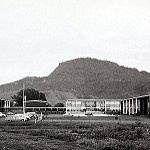

In [50]:
my_image

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 147, 147, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 70, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [53]:
image_array = image.img_to_array(sample_image)

In [56]:
image_array.shape

(150, 150, 3)

In [57]:
image_array = image_array.reshape(1,150,150,3)

In [59]:
model.predict_classes(image_array)

array([0])

In [60]:
train_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

### Lets try a random Image

In [65]:
forest_images = os.listdir(train_dir+"/forest")

In [137]:
from random import randint
random_index = randint(1, len(forest_images))
random_image = forest_images[random_index]

In [138]:
random_image_path = train_dir+"/forest/"+random_image

In [139]:
sample_forest = image.load_img(random_image_path)

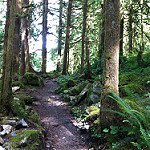

In [140]:
sample_forest

In [141]:
random_image_array = image.img_to_array(sample_forest)

In [142]:
random_image_array.shape

(150, 150, 3)

In [143]:
random_image_array = random_image_array.reshape(1,150,150,3)

In [144]:
model.predict_classes(random_image_array)

array([0])